# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

 - **Question 1.** Find the normalization constant $H(a,b)$.

- **Question 2.** Compute the expected value $\mu$ of the distribution.

- **Question 3.** Compute the _cumulative density function_ $F(t)$ of the distribution.

* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

- **Question 5.** Are the expected value and the median equal? How do the compare with the mode of the distribution? Comment the results.

## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$. 

- **Question 9.** Use the expression of the expected value you computedabove to find an estimator $\hat a_\text{mean}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_\text{median}$ as a function of the empirical median $\bar m$.

- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the vaules of $\hat a_\text{mean}$ and $\hat a_\text{median}$ for the data you have in the file `fixed_b.npy`?

 - **Question 11.** Consider the log-likelihood function $\mathcal{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

 - **Question 12.** What is the maximum likelihood estimator $\hat a_\text{MLE}$?

- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

 - **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.
 

- **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_\text{jeff}$? Provide also the confidence intervals.

All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#### Question 6

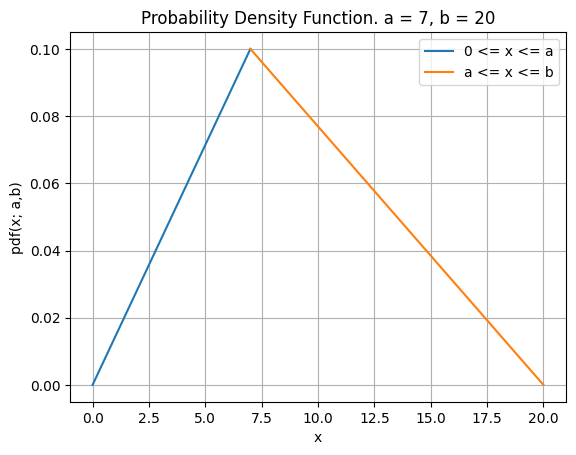

In [2]:
def pdf(x, a, b):
    H = 2/b
    #idx_P1 = np.where(np.logical_and(x >= 0, x <= a))
    #idx_P2 = np.where(np.logical_and(x >= a, x <= b))
    #piece1 = H * x[idx_P1]/a
    #piece2 = H * (b-x[idx_P2])/(b-a)
    if np.isscalar(x):
        if x >= 0 and x <= a:
            p_x = H * x/a
        elif x >= a and x <= b:
            p_x = H * (b-x)/(b-a)
        else:
            p_x = 0
        return p_x
    else:
        return np.piecewise(x, [x < a, (x >= a) & (x <= b), (x > b) | (x < 0)], 
                            [lambda x: 2/b * x/a, lambda x: 2/b * (b-x)/(b-a), 0])
   
        
    return p_x

a = 7
b = 20
x_P1 = np.linspace(0, a)
x_P2 = np.linspace(a,b)[1:]
x = np.zeros(len(x_P1) + len(x_P2))
x[0:len(x_P1)] = x_P1
x[len(x_P1):]  = x_P2

#piece1, piece2 = pdf(x, a, b=20)
y = np.array([pdf(i, a, b) for i in x])
idx_P1 = np.where(np.logical_and(x >= 0, x <= a))
idx_P2 = np.where(np.logical_and(x >= a, x <= b))


plt.plot(x[idx_P1], y[idx_P1], label=f'0 <= x <= a')
plt.plot(x[idx_P2], y[idx_P2], label=f'a <= x <= b')
#plt.axvline(49.67,color = 'blue',linewidth=2)
#plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.title('Probability Density Function. a = 7, b = 20')
plt.xlabel('x')
plt.ylabel('pdf(x; a,b)')
plt.grid(True)
plt.legend()
plt.show()


### Question 7

In the file there are 100 sample points


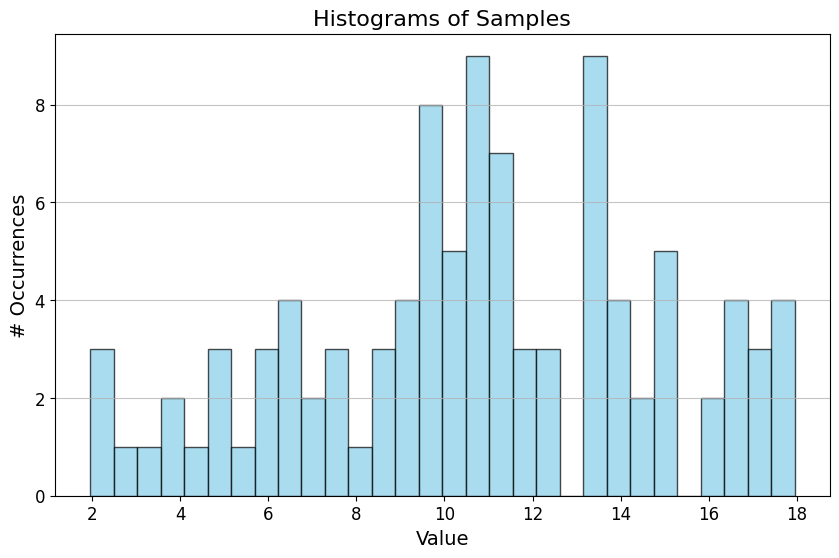

In [3]:

data_fixed_b = np.load('fixed_b.npy')

n = len(data_fixed_b)
print(f"In the file there are {n} sample points")

plt.figure(figsize=(10, 6))
plt.hist(data_fixed_b, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograms of Samples', fontsize=16)  
plt.xlabel('Value', fontsize=14) 
plt.ylabel('# Occurrences', fontsize=14)  
plt.grid(axis='y', alpha=0.75)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()  

### Question 8

In [4]:
mean = np.mean(data_fixed_b)
m    = np.median(data_fixed_b)

print(f"Mean = {mean}")
print(f"Median = {m}")

Mean = 10.739751742853539
Median = 10.700494688840413


### Question 10

In [5]:
def estimator_mean(dataset, b):
    mean = np.mean(dataset)
    a_est = 3*mean - b      # mean = (a+b)/3
    return a_est

def estimator_median(dataset, b):
    median = np.median(dataset)
    a_est = median**2 * 2/b
    if a_est >= b/2:
        return a_est
    else:
        a_est = b - (2*(b-median)**2)/b
    return a_est
        

In [6]:
a_est_mean = estimator_mean(data_fixed_b, b=20)
a_est_median = estimator_median(data_fixed_b, b=20)

print(f"a estimated with mean = {a_est_mean}")
print(f"a estimated with median = {a_est_median}")

a estimated with mean = 12.219255228560613
a estimated with median = 11.450058658590189


### Question 11

Assume a to be uniformely distributed

In [7]:
def loglh(a,b,x):
  logl=0
  for i in x: logl+=np.log(pdf(i, a, b))
  return logl

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_2324\1290053294.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_2324\1290053294.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14);
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_2324\1290053294.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14);


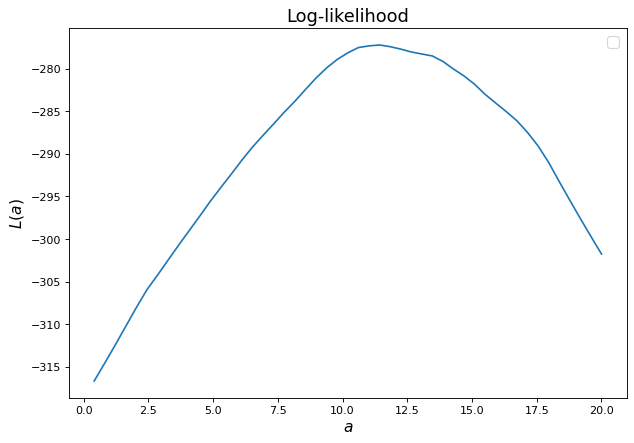

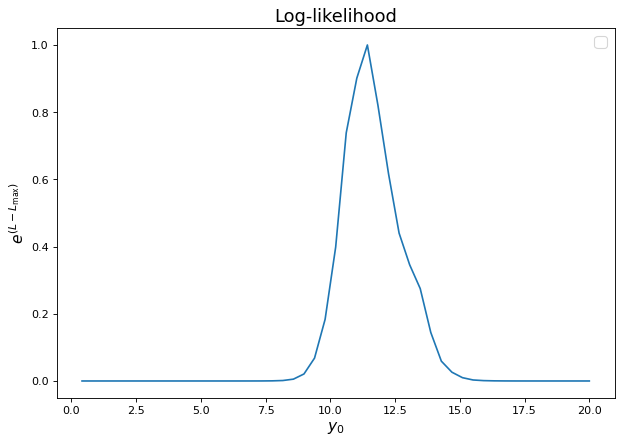

In [8]:
a_tab = np.linspace(0,b)[1:]

loglh_tab = list()
for a in a_tab:
    l = loglh(a, b, data_fixed_b)
    loglh_tab.append(l)
    
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$a$', fontsize=14)
plt.ylabel('$L(a)$', fontsize=14)
plt.plot(a_tab,loglh_tab)
plt.legend(fontsize=14);

# Plot also the exponential to see a sharper peak
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(a_tab,np.exp(loglh_tab-max(loglh_tab)))
plt.legend(fontsize=14);

### Question 12

In [9]:
a_ML_vec = list()

a_guess = np.random.uniform(0,20)
optimum = minimize(lambda a0:-loglh(a0,b,data_fixed_b), a_guess, method='Nelder-Mead')
a_ML_vec.append(optimum.x)

a_est_ML = np.array(a_ML_vec).mean()   
print(f"a ML estimation: {a_est_ML}")

a ML estimation: 11.365784964963591


### Question 13

In [10]:
def estimator_ML(dataset):
    a_guess = np.random.uniform(0,b)
    optimum = minimize(lambda a0:-loglh(a0,b,dataset), a_guess, method='Nelder-Mead') 
    return optimum.x[0]

In [11]:
reps = 100
boot_dataset = np.random.choice(data_fixed_b, (reps,n), replace=True)

a_mean_boot = list()
a_median_boot = list()
a_ML_boot = list()

for d in boot_dataset:
    mean = np.mean(d)
    m = np.median(d)
    a_mean_boot.append(estimator_mean(data_fixed_b, b))
    a_median_boot.append(estimator_median(data_fixed_b, b))
    a_ML_boot.append(estimator_ML(d))
    
mean_CI = np.percentile(a_mean_boot, [2.5, 97.5])
median_CI = np.percentile(a_median_boot, [2.5, 97.5])
ML_CI = np.percentile(a_ML_boot, [2.5, 97.5])

TypeError: estimator_median() takes 2 positional arguments but 3 were given

In [20]:
print(f"Confidence interval mean: lower = {mean_CI[0]:.3f}, upper = {mean_CI[1]:.3f}, width = {(mean_CI[1] - mean_CI[0]):.3f}")
print(f"Confidence interval median: lower = {median_CI[0]:.3f}, upper = {median_CI[1]:.3f}, width = {(median_CI[1] - median_CI[0]):.3f}")
print(f"Confidence interval ML: lower = {ML_CI[0]:.3f}, upper = {ML_CI[1]:.3f}, width = {(ML_CI[1] - ML_CI[0]):.3f}")

Confidence interval mean: lower = 9.668, upper = 14.721, width = 5.053
Confidence interval median: lower = 10.095, upper = 13.282, width = 3.188
Confidence interval ML: lower = 10.018, upper = 13.847, width = 3.828


The Jeffrey's prior is:

$p(a)\; \propto \; \sqrt{\frac{1}{a(20-a)}}$ $\;\;$  given $b=20$

In [25]:

def jeffpost(a, b, x):
    jeff_prior = np.sqrt(1/(a*(20-a)))
    jp = np.log(jeff_prior)
    for i in x: jp+=np.log(pdf(i, a, b))
    return jp

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\4118680584.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\4118680584.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14);
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\4118680584.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14);


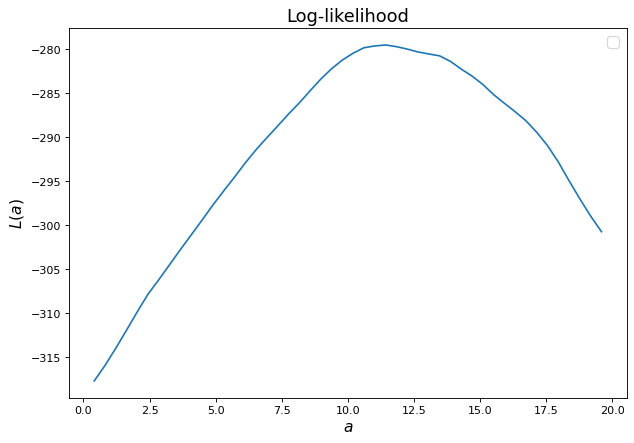

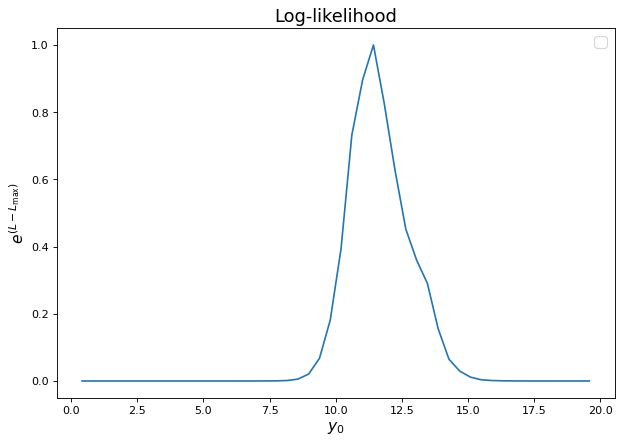

In [26]:
a_tab = np.linspace(0,b)[1:-1]

jeff_tab = list()
for a in a_tab:
    l = jeffpost(a, b, data_fixed_b)
    jeff_tab.append(l)
    
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$a$', fontsize=14)
plt.ylabel('$L(a)$', fontsize=14)
plt.plot(a_tab,jeff_tab)
plt.legend(fontsize=14);

# Plot also the exponential to see a sharper peak
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(a_tab,np.exp(jeff_tab-max(jeff_tab)))
plt.legend(fontsize=14);

In [46]:
def estimator_jeff(dataset):
    a_guess = np.random.uniform(0,b)
    optimum = minimize(lambda a0:-jeffpost(a0,b,dataset), a_guess, method='Nelder-Mead') 
    return optimum.x[0]

a_est_jeff = estimator_jeff(data_fixed_b)
print(f"Estimation using Jeffrey's prios: {a_est_jeff}")

Estimation using Jeffrey's prios: 11.365880647975438


### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

Use inverse transform sampling

In [28]:
def inv_cdf(u, a, b):
    if u <= 0:
        return 0
    if u >= 1:
        return b
    
    t = np.sqrt(u*b*a)
    if 0 < t < a:
        return t
    else:
        t = b - np.sqrt(b*(b-a)*(1-u))
    return t

def sample_opt(a, b):
    u = np.random.uniform(0, 1)
    s = inv_cdf(u, a, b)
    return s

In [31]:
n = 100000
b = 20
a_tab = np.linspace(0, 20, 11)[1:]

samples = list()
for a in a_tab:
    s = list()
    for i in range(n):
        s.append(sample_opt(a, b))
    samples.append(np.array(s))

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\2964478504.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\2964478504.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


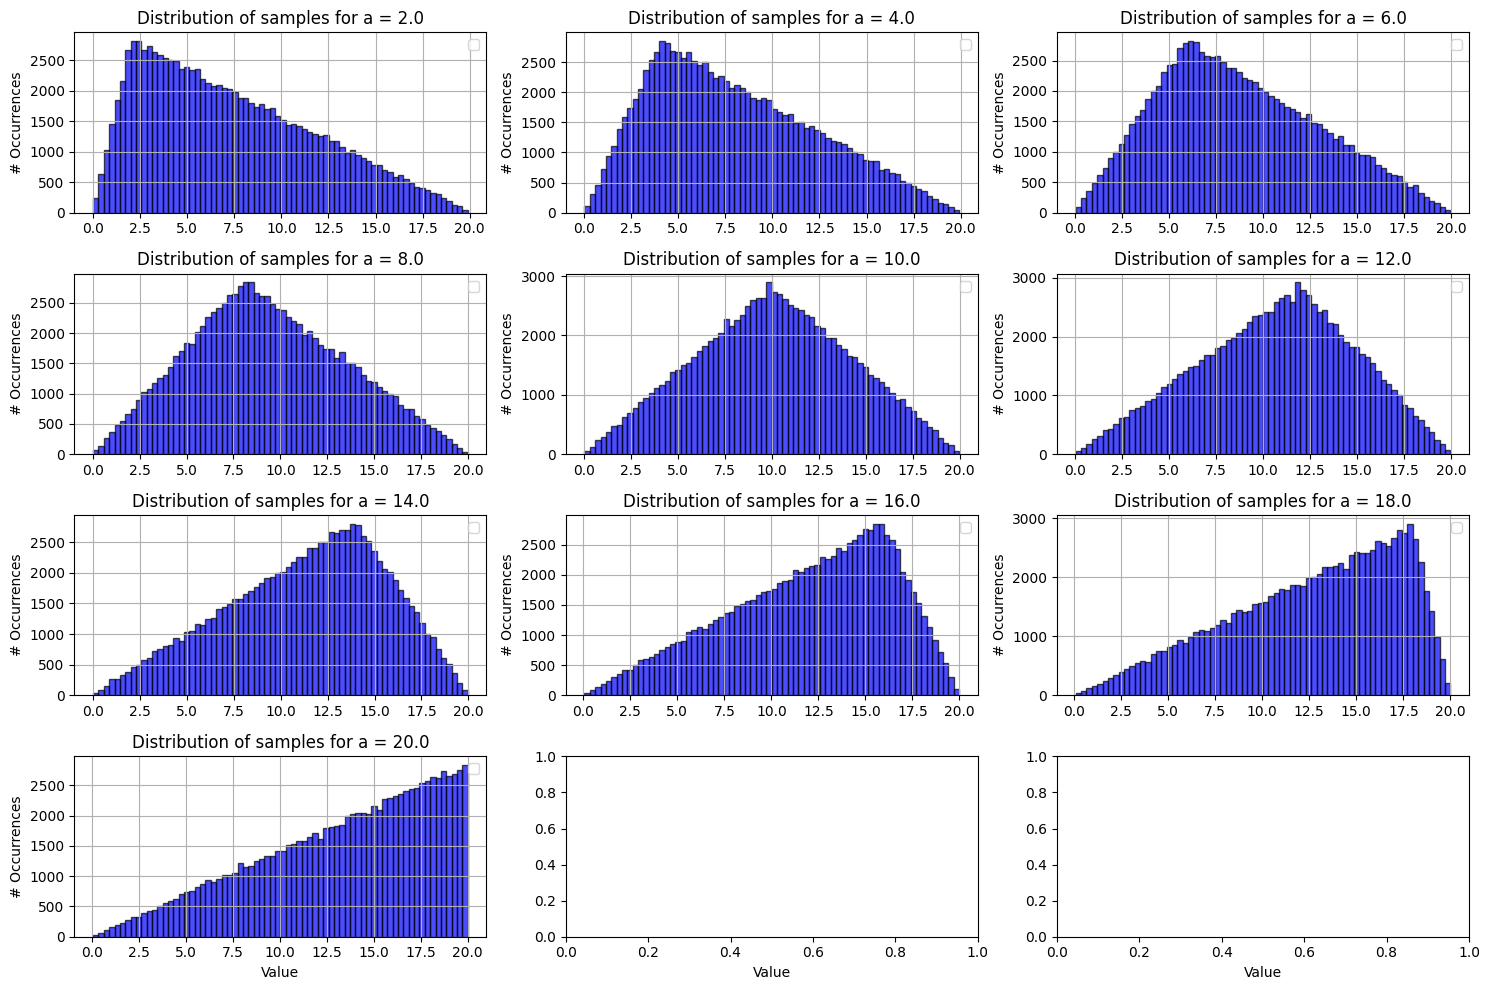

In [32]:
# Plot one to verify

fig, axs = plt.subplots(4, 3, figsize=(15, 10), constrained_layout=True)
axs = axs.flatten()
for i in range(len(a_tab)):
    axs[i].hist(samples[i], bins=70, color='blue', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Distribution of samples for a = {a_tab[i]}')
    axs[i].set_ylabel('# Occurrences')
    axs[i].legend()
    axs[i].grid(True)
for ax in axs[-3:]:
    ax.set_xlabel('Value')

plt.tight_layout()
plt.show()


Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

In [115]:
n_samples = 1000
b = 20
a_tab = np.linspace(0, 20, 21)[1:]

samples = list()
for a in a_tab:
    s = list()
    for i in range(n_samples):
        s.append(sample_opt(a, b))
    samples.append(np.array(s))
    
def sample_n_points(n, a, b):
    s = list()
    for i in range(n):
        s.append(sample_opt(a, b))
    return s

In [118]:
# Perform the sampling 300 times for each value of a
# Construct a dictionary where the keys are the a values and the elements 2D vectors containing 300 arrays of 1000 samples
n_reps = 300
n_samples = 1000
sampling_dict = dict()
for a in a_tab:
    samples = list()
    for i in range(n_reps):
        samples.append(sample_n_points(n_samples, a, b=20))
    sampling_dict[a] = samples

In [125]:
def MSE(sampling_dict, a_tab, n_reps, estimator, *args, **kwargs):
    #squared_error = np.zeros((len(a_tab), n_samples))
    mse = np.zeros(len(a_tab))
    for j,a in enumerate(a_tab):   # Sample with a sapecific a
        a_est = np.zeros(n_reps)
        for i,s in enumerate(sampling_dict[a]):
            a_est[i] = (estimator(s, *args, **kwargs))
        mse[j] = np.mean((a_est - np.full(n_reps, a_tab[j]))**2)
    return mse
        


In [120]:
n_sample = 1000

### Question 16

In [126]:
n_reps = 300

#mse_mean = MSE(samples, a_tab, n_samples, n_reps, estimator_mean, b=20)
#mse_median = MSE(samples, a_tab, n_samples, n_reps, estimator_median, b=20)
mse_ML = MSE(sampling_dict, a_tab, n_reps, estimator_ML)
#mse_jeff = MSE(samples, a_tab, n_samples, n_reps, estimator_jeff)


In [130]:
mse_jeff = MSE(sampling_dict, a_tab, n_reps, estimator_jeff)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\2515993654.py:2: RuntimeWarning: invalid value encountered in sqrt
  jeff_prior = np.sqrt(1/(a*(20-a)))
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_6424\2515993654.py:2: RuntimeWarning: divide by zero encountered in divide
  jeff_prior = np.sqrt(1/(a*(20-a)))
c:\Users\Alessandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:836: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


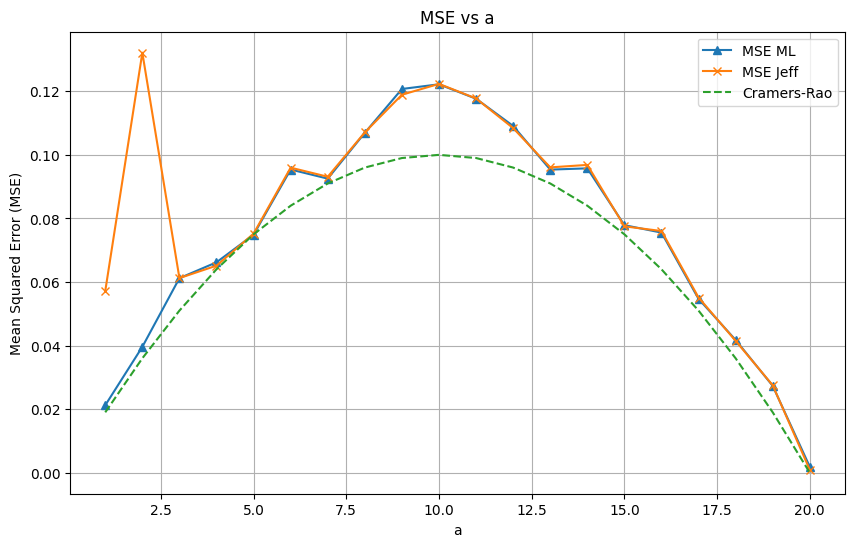

In [131]:
plt.figure(figsize=(10, 6))

#plt.plot(a_tab, mse_mean, label='MSE Mean', marker='o')
#plt.plot(a_tab, mse_median, label='MSE Median', marker='s')
plt.plot(a_tab, mse_ML, label='MSE ML', marker='^')
plt.plot(a_tab, mse_jeff, label='MSE Jeff', marker='x')
plt.plot(a_tab, a_tab*(20 - a_tab)/n_sample, label= "Cramers-Rao", linestyle='--' )

# Add labels and title
plt.xlabel('a')
plt.ylabel('Mean Squared Error (MSE)') 
plt.title('MSE vs a')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

In [21]:
dataset = np.load('full.npy')
n = len(dataset)
print(f"There are {n} sample points")

There are 10000 sample points


- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


In [22]:
def loglh(a,b,x):
  logl=0
  for i in x:
    logl+=np.log(pdf(i, a, b) + 1e-10)
  return logl

In [25]:
# Array of candidate values. Assume uniform distribution

tab_b = np.arange(1, 100)   # a and b are integers of 2 digits
tab_a = np.arange(1, 100)
# Comoute the log likelyhood
z_list = list()
for b in tab_b:
    for a in tab_a:
        if a <= b:
            z_list.append(loglh(a, b , dataset))
        else:
            z_list.append(0)

zs = np.array(z_list)
A, B = np.meshgrid(tab_a,tab_b)
Z = zs.reshape(A.shape)
#Z = np.zeros((len(zs), len(zs)))
#for i in range(len(zs)):
#    Z[i] = zs


Text(0.5, 0, '$L$')

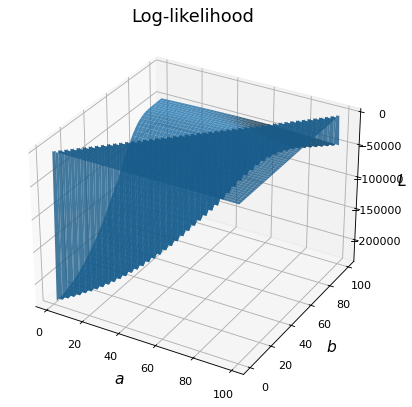

In [26]:
# Plot the log likelihood
fig = plt.figure(figsize=(9,6), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
ax.plot_surface(A, B, Z, alpha=0.8)
ax.set_xlabel('$a$', fontsize=14)
ax.set_ylabel('$b$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)

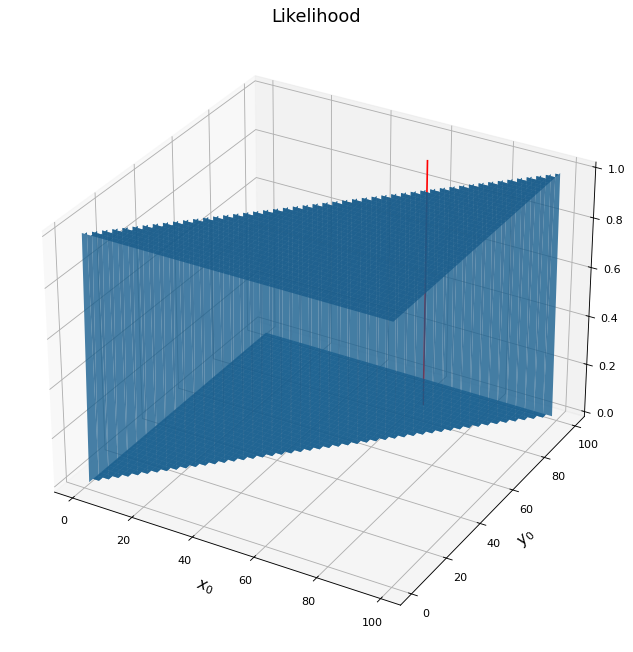

In [27]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Likelihood', fontsize=16)
Zexp = np.exp(Z-max(zs))
ax.plot_surface(A, B, Zexp, alpha=0.8)
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.plot( np.full(1000, 63), np.full(1000, 86), np.linspace(0,1, 1000),color='r')


In [28]:
def f(params):
  a,b = params
  return -loglh(a,b,dataset)

#ab = (np.ceil(np.random.uniform(1,99)),np.ceil(np.random.uniform(1,99)))
#while(ab[0] > ab[1]):
#    ab = (np.ceil(np.random.uniform(1,99)),np.ceil(np.random.uniform(1,99)))
#b0ounds = [(-40,40),(0,50)]
a_ML = 1
b_ML = 0
while a_ML > b_ML:
  b = np.ceil(np.random.uniform(1,99))
  a = np.ceil(np.random.uniform(1,b-1))
  print(f"b init = {b}, a init = {a}")
  ab = (a,b)
  optimum = minimize(f,ab, method='Nelder-Mead')
  a_ML = optimum.x[0]
  b_ML = optimum.x[1]

print(f"The estimated a is: {a_ML} and the estimated b is: {b_ML}")

b init = 44.0, a init = 4.0
The estimated a is: 62.99361602508725 and the estimated b is: 85.89708560764045


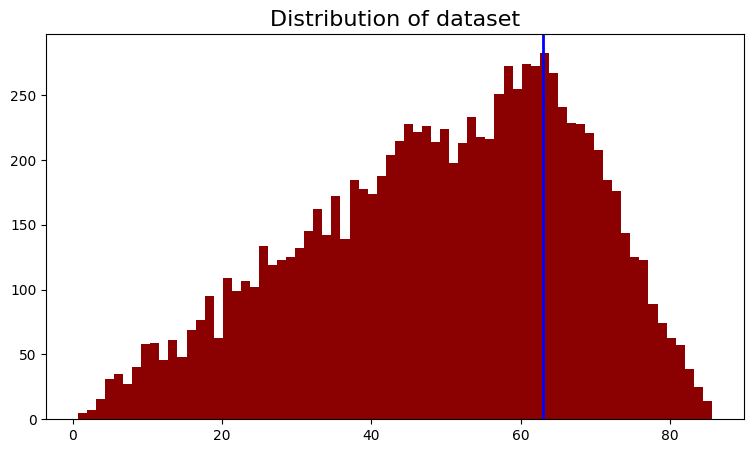

In [29]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plt.title("Distribution of dataset", size = 16)
ax.hist(dataset, bins=70, color ='darkred', label = f"x0")
plt.axvline(63,color = 'blue',linewidth=2)
plt.show()


- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

In [35]:
# Bootstrapping on the sampled values
reps = 100
n = len(dataset)
np.random.seed(123)
boot_dataset = np.random.choice(dataset, (reps,n), replace=True)

a_est_list = list()
b_est_list = list()

def f(params):
  a,b = params
  return -loglh(a,b,d)

for i,d in enumerate(boot_dataset):
  print(f"Iteration: {i}")
  a_est = 1
  b_est = 0
  while a_est > b_est:
    b = np.ceil(np.random.uniform(1,99))
    a = np.ceil(np.random.uniform(1,b-1))
    ab = (a,b)
    optimum = minimize(f,ab, method='Nelder-Mead')
    a_est = optimum.x[0]
    b_est = optimum.x[1]
  a_est_list.append(a_est)
  b_est_list.append(b_est)
  
a_est_CI_jeff = np.percentile(a_est_list, [2.5, 97.5])
b_est_CI_jeff = np.percentile(b_est_list, [2.5, 97.5])

print(f"Confidence interval a: lower bound = {a_est_CI_jeff[0]}, upper bound = {a_est_CI_jeff[1]}")
print(f"Confidence interval b: lower bound = {b_est_CI_jeff[0]}, upper bound = {b_est_CI_jeff[1]}")

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11060\1130783072.py:4: RuntimeWarning: invalid value encountered in log
  logl+=np.log(pdf(i, a, b) + 1e-10)


Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iterat

In [52]:
print(f"Confidence interval a: lower bound = {a_est_CI_jeff[0]}, upper bound = {a_est_CI_jeff[1]}. Width = {a_est_CI_jeff[1] - a_est_CI_jeff[0]}")
print(f"Confidence interval b: lower bound = {b_est_CI_jeff[0]}, upper bound = {b_est_CI_jeff[1]}. Width = {a_est_CI_jeff[1] - a_est_CI_jeff[0]}")

Confidence interval a: lower bound = 62.354738041566364, upper bound = 63.792648407914164. Width = 1.4379103663478006
Confidence interval b: lower bound = 85.59779667722606, upper bound = 86.1300600134327. Width = 1.4379103663478006


In [51]:
a_est_list = np.array(a_est_list)
b_est_list = np.array(b_est_list)

a_final = round(np.mean(a_est_list))
b_final = round(np.mean(b_est_list))

print(f"a = {a_final}")
print(f"b = {b_final}")
print(f"Secret code = {a_final}{b_final}")

a = 63
b = 86
Secret code = 6386


In [1]:
(63+86)/3

49.666666666666664

- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?